Task-2 (Exploratory Data Analysis (EDA) & Business Intelligence)

Exploratory Data Analysis (EDA)

In [5]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
f=pd.read_csv("airlines.csv")
print(f)

    Index    Airline   Flight Source_City  Depature_Time Stops   Arrival_Time  \
0       0   SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       1   SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2       2    AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3       3    Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4       4    Vistara   UK-963       Delhi        Morning  zero        Morning   
5       5    Vistara   UK-945       Delhi        Morning  zero      Afternoon   
6       6    Vistara   UK-927       Delhi        Morning  zero        Morning   
7       7    Vistara   UK-951       Delhi      Afternoon  zero        Evening   
8       8   GO_FIRST   G8-334       Delhi  Early_Morning  zero        Morning   
9       9   GO_FIRST   G8-336       Delhi      Afternoon  zero        Evening   
10     10   GO_FIRST   G8-392       Delhi      Afternoon  zero        Evening   
11     11   GO_FIRST   G8-33

In [3]:
print(f.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             31 non-null     int64  
 1   Airline           31 non-null     object 
 2   Flight            31 non-null     object 
 3   Source_City       31 non-null     object 
 4   Depature_Time     31 non-null     object 
 5   Stops             31 non-null     object 
 6   Arrival_Time      31 non-null     object 
 7   Destination_City  31 non-null     object 
 8   Class             31 non-null     object 
 9   Duration          31 non-null     float64
 10  Days_Left         31 non-null     int64  
 11  Price             31 non-null     int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 3.0+ KB
None


In [4]:
print(f.describe())

           Index   Duration  Days_Left         Price
count  31.000000  31.000000       31.0     31.000000
mean   15.000000   4.497419        1.0   6539.419355
std     9.092121   4.510836        0.0   1404.391725
min     0.000000   2.080000        1.0   5949.000000
25%     7.500000   2.170000        1.0   5954.000000
50%    15.000000   2.250000        1.0   5955.000000
75%    22.500000   3.125000        1.0   6060.000000
max    30.000000  16.330000        1.0  10575.000000


In [5]:
#missing values
print(f.isnull().sum())

Index               0
Airline             0
Flight              0
Source_City         0
Depature_Time       0
Stops               0
Arrival_Time        0
Destination_City    0
Class               0
Duration            0
Days_Left           0
Price               0
dtype: int64


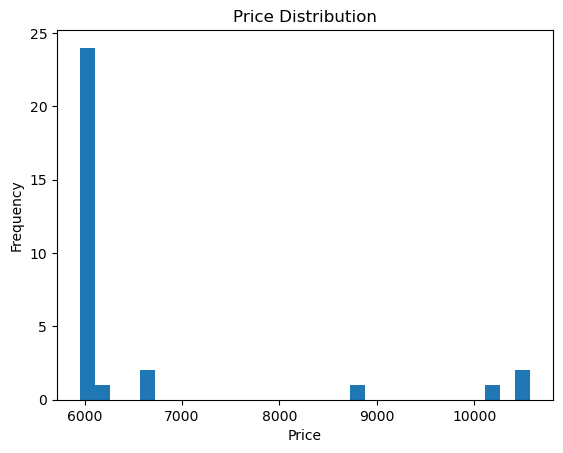

In [11]:
#Price distribution
plt.hist(f["Price"],bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

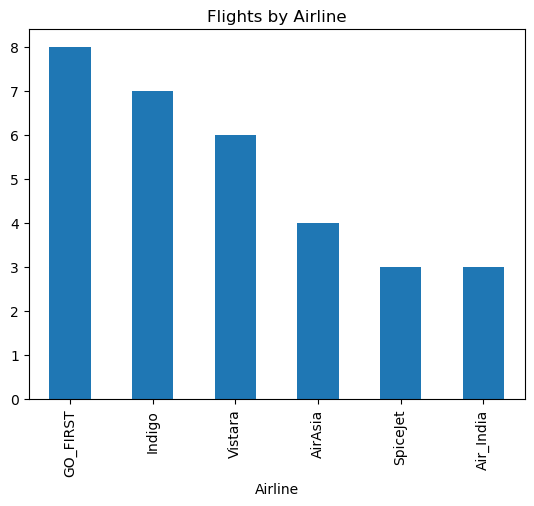

In [13]:
#Airline count
f["Airline"].value_counts().plot(kind="bar")
plt.title("Flights by Airline")
plt.show()

file in to sql file

In [11]:
import pandas as pd
import sqlite3

# Read the CSV file
df = pd.read_csv("airlines.csv")

# Create / connect to SQL database
conn = sqlite3.connect("airlines.db")

# Store CSV data into SQL table
df.to_sql("flights", conn, if_exists="replace", index=False)

print("CSV file loaded into SQL successfully")

CSV file loaded into SQL successfully


In [12]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("airlines.db")

In [13]:
query = "SELECT * FROM flights;"
df_sql = pd.read_sql(query, conn)
print(df_sql)

    Index    Airline   Flight Source_City  Depature_Time Stops   Arrival_Time  \
0       0   SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       1   SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2       2    AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3       3    Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4       4    Vistara   UK-963       Delhi        Morning  zero        Morning   
5       5    Vistara   UK-945       Delhi        Morning  zero      Afternoon   
6       6    Vistara   UK-927       Delhi        Morning  zero        Morning   
7       7    Vistara   UK-951       Delhi      Afternoon  zero        Evening   
8       8   GO_FIRST   G8-334       Delhi  Early_Morning  zero        Morning   
9       9   GO_FIRST   G8-336       Delhi      Afternoon  zero        Evening   
10     10   GO_FIRST   G8-392       Delhi      Afternoon  zero        Evening   
11     11   GO_FIRST   G8-33

In [14]:
query = "SELECT Airline FROM flights;"
df_airline = pd.read_sql(query, conn)
print(df_airline)

      Airline
0    SpiceJet
1    SpiceJet
2     AirAsia
3     Vistara
4     Vistara
5     Vistara
6     Vistara
7     Vistara
8    GO_FIRST
9    GO_FIRST
10   GO_FIRST
11   GO_FIRST
12     Indigo
13     Indigo
14     Indigo
15     Indigo
16  Air_India
17  Air_India
18    AirAsia
19    AirAsia
20   GO_FIRST
21   GO_FIRST
22   GO_FIRST
23  Air_India
24     Indigo
25    Vistara
26     Indigo
27    AirAsia
28   SpiceJet
29     Indigo
30   GO_FIRST


In [15]:
query = "SELECT DISTINCT Airline FROM flights;"
print(pd.read_sql(query, conn))

     Airline
0   SpiceJet
1    AirAsia
2    Vistara
3   GO_FIRST
4     Indigo
5  Air_India


In [16]:
conn.close()

Multivariate Analysis & Correlation

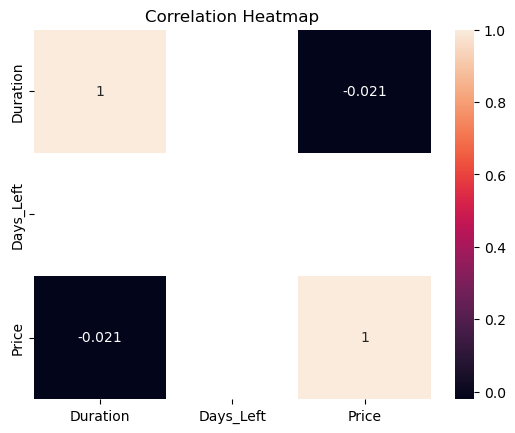

In [7]:
#Correlation matrix
numeric_cols = ['Duration', 'Days_Left', 'Price']
corr = f[numeric_cols].corr()

sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

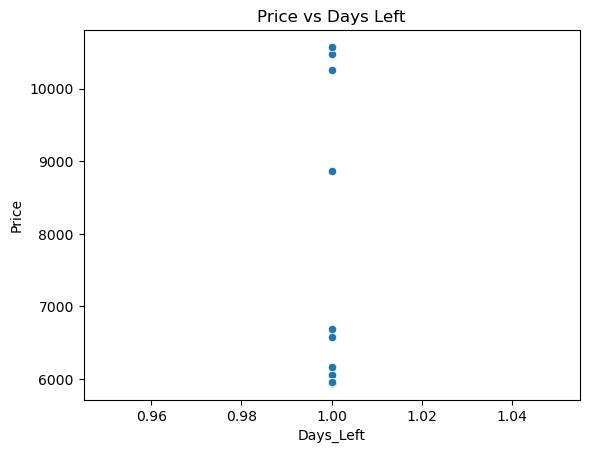

In [9]:
#Price vs Days left
sns.scatterplot(x='Days_Left', y='Price', data=f)
plt.title("Price vs Days Left")
plt.show()

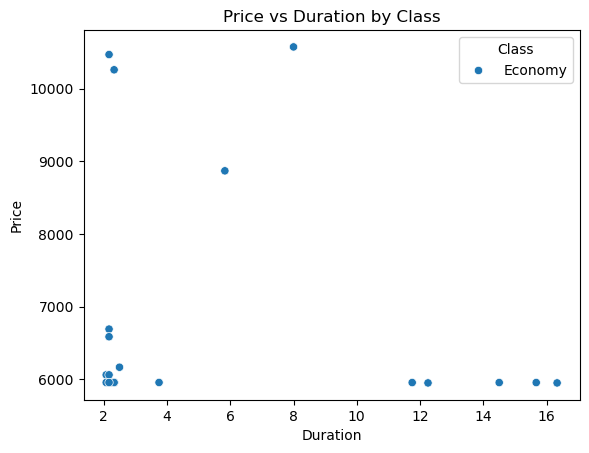

In [10]:
#Price vs Duration by class
sns.scatterplot(x='Duration', y='Price', hue='Class', data=f)
plt.title("Price vs Duration by Class")
plt.show()